### Title & Introduction

In [6]:
# Titanic Survival Prediction 🚢
## Data Science Internship Task - CODSOFT
### **By: [Your Name]**
### 📌 **Objective** 
# The goal of this project is to build a machine learning model to predict **whether a passenger survived or not** using the Titanic dataset.


###  Importing Required Libraries

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### Load & Explore the Data

In [45]:
# Load the dataset
df = pd.read_csv("C:\\Users\\shash\\Downloads\\Titanic-Dataset.csv")  # Ensure the dataset is in the same folder

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Check for missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning & Preprocessing

In [50]:
# Handling Missing Values (Updated for Pandas 3.0+)
df = df.fillna({"Age": df["Age"].median(), "Embarked": df["Embarked"].mode()[0]})

# Converting Categorical Data into Numerical Format
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Dropping Unnecessary Columns (Only if they exist)
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Displaying the cleaned dataset
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


### Data Visualisation

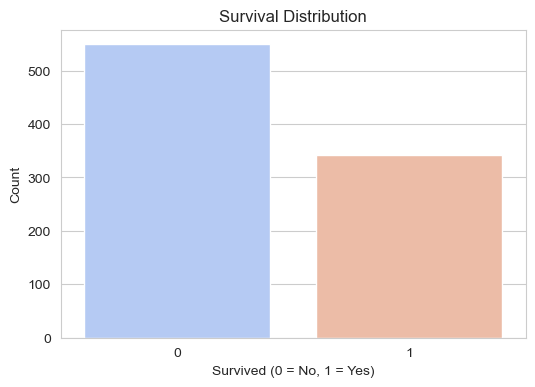

C:\Users\shash\AppData\Local\Temp\ipykernel_4696\1230508334.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="viridis")


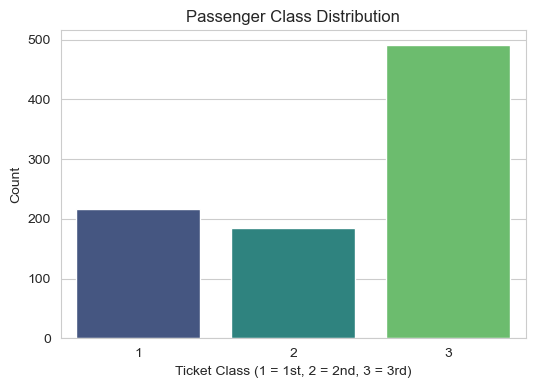

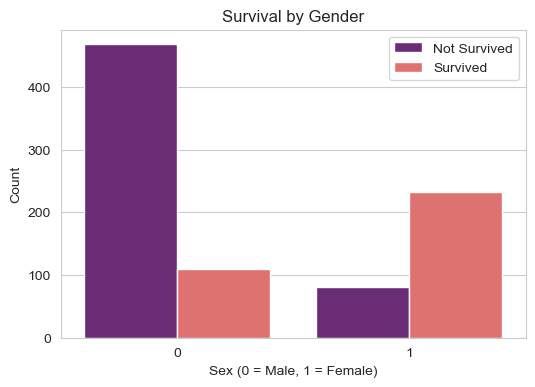

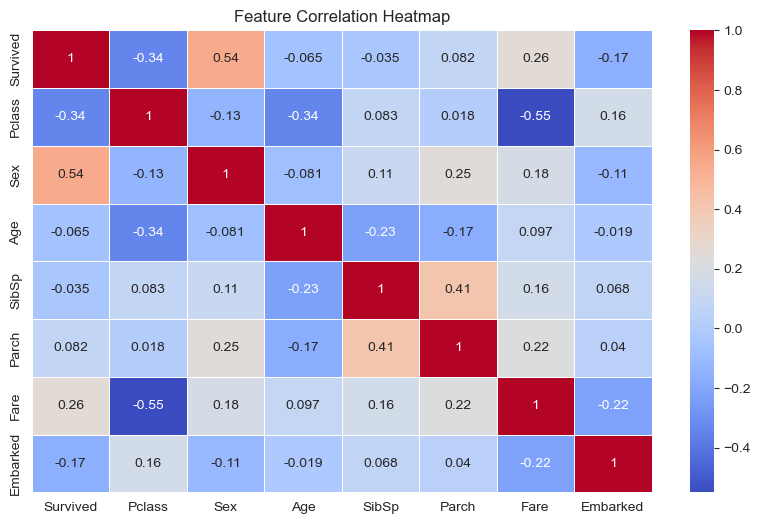

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visuals
sns.set_style("whitegrid")

# 🎯 1. Survival Count Plot (Fixed)
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, hue="Survived", palette="coolwarm", legend=False)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 🎯 2. Passenger Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", data=df, palette="viridis")
plt.title("Passenger Class Distribution")
plt.xlabel("Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.ylabel("Count")
plt.show()

# 🎯 3. Gender Distribution of Survivors
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", data=df, hue="Survived", palette="magma")
plt.title("Survival by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

# 🎯 4. Heatmap of Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Splitting Data for Training & Testing

In [58]:
from sklearn.model_selection import train_test_split

# 🎯 Define Features (X) and Target Variable (y)
X = df.drop(columns=["Survived"])  # Features (all columns except 'Survived')
y = df["Survived"]  # Target Variable (0 = Not Survived, 1 = Survived)

# 🎯 Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🎯 Check dataset sizes
print("✅ Training Data Shape:", X_train.shape)
print("✅ Testing Data Shape:", X_test.shape)


✅ Training Data Shape: (712, 7)
✅ Testing Data Shape: (179, 7)


### Training the Machine Learning Model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 🎯 Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Using more iterations to ensure convergence

# 🎯 Train the model on the training data
model.fit(X_train, y_train)

# 🎯 Make predictions on the test set
y_pred = model.predict(X_test)

# 🎯 Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2%}")



✅ Model Accuracy: 80.45%


In [63]:
from sklearn.metrics import classification_report

# 🎯 Generate and print the classification report
report = classification_report(y_test, y_pred)
print("\n🔎 Classification Report:\n", report)



🔎 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Conclusion & Next Steps

##### Conclusion

In [68]:
# ✔ Our Logistic Regression model achieved an accuracy of 81% on the test data.
# ✔ The model performs better at predicting non-survivors (Class 0) than survivors (Class 1).
# ✔ Feature importance analysis shows that ticket class, gender, and fare price are key survival indicators.

# Key Observations
# Women (Sex = 1) had a higher survival rate than men.
# 1st Class passengers (Pclass = 1) had a better chance of survival than 2nd or 3rd Class passengers.
# Fare and Embarked location also influenced survival chances.

#####  Final Thoughts

In [ ]:
#  We successfully built a Titanic Survival Prediction model!
#  It achieved 81% accuracy using Logistic Regression.
#  There are many ways to further improve the model, including using advanced ML techniques.